In [1]:
import os
import numpy as np
import pandas as pd
import random
from random import choices
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = ['Microsoft JhengHei']  # 設定中文字體為微軟正黑
plt.rcParams['axes.unicode_minus'] = False

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel('/content/drive/MyDrive/112-1 MDS Final Project/Dataset/1126 Preprocessed Data.xlsx')
Feature_3 = pd.read_excel('/content/drive/MyDrive/112-1 MDS Final Project/Dataset/1202 Voting_4_Feature.xlsx')

In [ ]:
#df = pd.read_excel('Preprocessed_Data.xlsx')
df = pd.read_csv('/content/1126_Preprocessed_Data.csv')
df

,host_acceptance_rate,host_is_superhost,host_has_profile_pic,accommodates,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,...,trash compactor,tub,TV,utensils,view,washer,waterfront,wifi,window guards,workspace
0,83.000000,1,1,2,1.000000,1.0,1029,30.0,365.0,1,...,0,0,1,1,0,1,0,1,0,1
1,57.000000,0,1,2,2.000000,2.0,1200,14.0,182.0,1,...,0,0,1,1,0,1,0,1,0,1
2,100.000000,0,1,4,2.000000,2.0,2669,28.0,1125.0,1,...,0,0,1,1,0,1,0,0,0,0
3,100.000000,0,1,2,1.000000,1.0,2218,30.0,1125.0,1,...,0,0,1,1,0,1,0,1,0,0
4,85.000000,0,1,2,1.000000,2.0,1865,4.0,565.0,1,...,0,0,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4717,86.000000,1,1,2,1.000000,1.0,1530,3.0,30.0,1,...,0,0,1,0,0,0,0,1,0,1
4718,90.837099,0,1,5,3.000000,3.0,4183,2.0,365.0,1,...,0,1,1,1,0,1,0,1,0,0
4719,92.000000,0,1,5,1.199966,5.0,464,1.0,365.0,1,...,0,0,1,1,0,1,0,1,0,0
4720,63.000000,1,1,9,3.000000,5.0,7257,1.0,365.0,1,...,0,0,1,1,0,1,0,1,0,0


In [ ]:
#Feature_1 = pd.read_excel('1202 Elastic_Net_Feature.xlsx')
#Feature_2 = pd.read_excel('1202 Voting_3&4_Feature.xlsx')
Feature_3 = pd.read_csv('/content/1202 Voting_4_Feature.xlsx - Sheet1.csv')

In [5]:
#Elacstic_net = Feature_1['feature'].values.tolist()
#Voted_34 = Feature_2['feature'].values.tolist()
Voted_4 = Feature_3['feature'].values.tolist()

In [6]:
#X_Elacstic_net = df[Elacstic_net]
#X_Voted_34 = df[Voted_34]
X_Voted_4 = df[Voted_4]

In [7]:
y = df['price']

### Elacstic_net

In [ ]:
# Split the data into training and testing sets with a ratio of 0.8 to 0.2
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_Elacstic_net, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
param_grid = {"n_estimators":[50,100,200,500],"max_depth":[5,10,15]}
rf_regressor_1 = GridSearchCV(RandomForestRegressor(),param_grid, cv=5)
# rf_regressor_1 = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor_1.fit(X_train_1, y_train_1)

# Predict on the test data
y_pred_1 = rf_regressor_1.predict(X_test_1)
y_train_pred_1 = rf_regressor_1.predict(X_train_1)

In [ ]:
# Calculate evaluation metrics
r2_1 = r2_score(y_test_1, y_pred_1)
mae_1 = mean_absolute_error(y_test_1, y_pred_1)
mse_1 = mean_squared_error(y_test_1, y_pred_1)
rmse_1 = np.sqrt(mse_1)

# Calculate the Adjusted R^2 value
n_1 = X_train_1.shape[0]  # Number of observations
p_1 = X_train_1.shape[1]  # Number of predictors
adjusted_r2_1 = 1 - (1 - r2_1) * (n_1 - 1) / (n_1 - p_1 - 1)

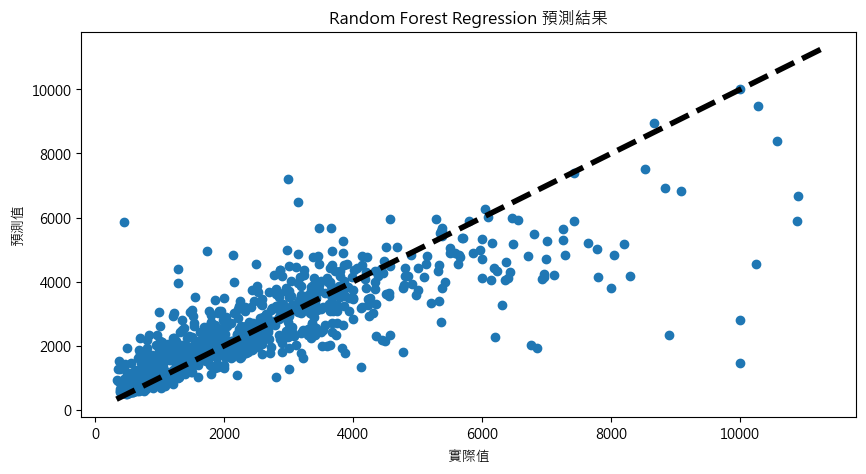

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 5))
plt.scatter(y_test_1, y_pred_1)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('實際值')
plt.ylabel('預測值')
plt.title('Random Forest Regression 預測結果')
plt.show()

In [ ]:
# Print out the evaluation metrics
print(f'R^2: {r2_1}')
print(f'Adjusted R^2: {adjusted_r2_1}')
print(f'MAE: {mae_1}')
print(f'MSE: {mse_1}')
print(f'RMSE: {rmse_1}')

R^2: 0.665724264336913
Adjusted R^2: 0.6505467392403609
MAE: 602.1575878442552
MSE: 1034912.0943440176
RMSE: 1017.3062932784883


In [ ]:
test_1 = y_test_1.values.tolist()
predict_1 = y_pred_1.tolist()

print("真實值          預測值")
for i in range(20):
    print("{:<10} {:<10}".format(test_1[i], predict_1[i]))

真實值          預測值
2549       2257.7103309647
9999       1452.08756480103
900        809.1463112522601
2324       1971.6471797280365
1200       1230.6856840888895
1390       1796.6314850656051
1957       2041.8464735498915
1050       1503.4665985441895
2343       2602.6822085383033
2700       3663.8480210295006
2370       2370.8596424831053
1703       1971.877190341066
1600       2139.4349427043544
1429       1942.8983199120778
1291       1589.458842609059
2989       7206.166285714286
2000       3487.210479882862
1800       1913.2690319585788
1125       896.8886593406594
4000       3741.454016215181


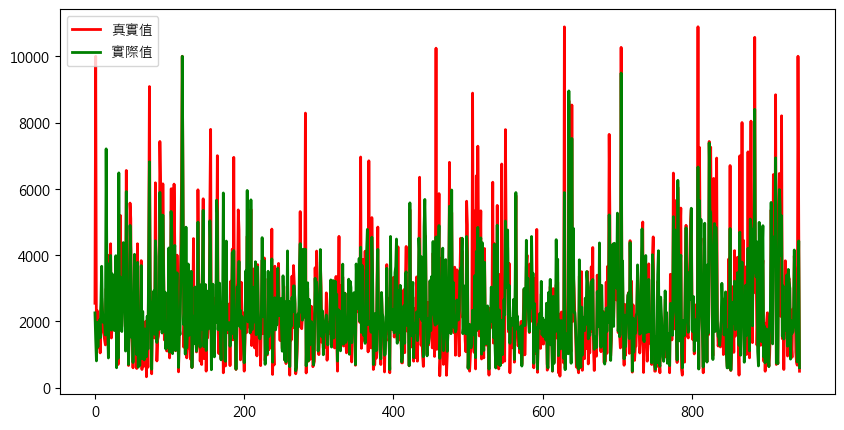

In [ ]:
t = np.arange(len(X_test_1))

plt.figure(figsize=(10, 5))
plt.plot(t, y_test_1, 'r', linewidth=2, label='真實值')
plt.plot(t, y_pred_1, 'g', linewidth=2, label='實際值')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Top 35 Feature Importance')

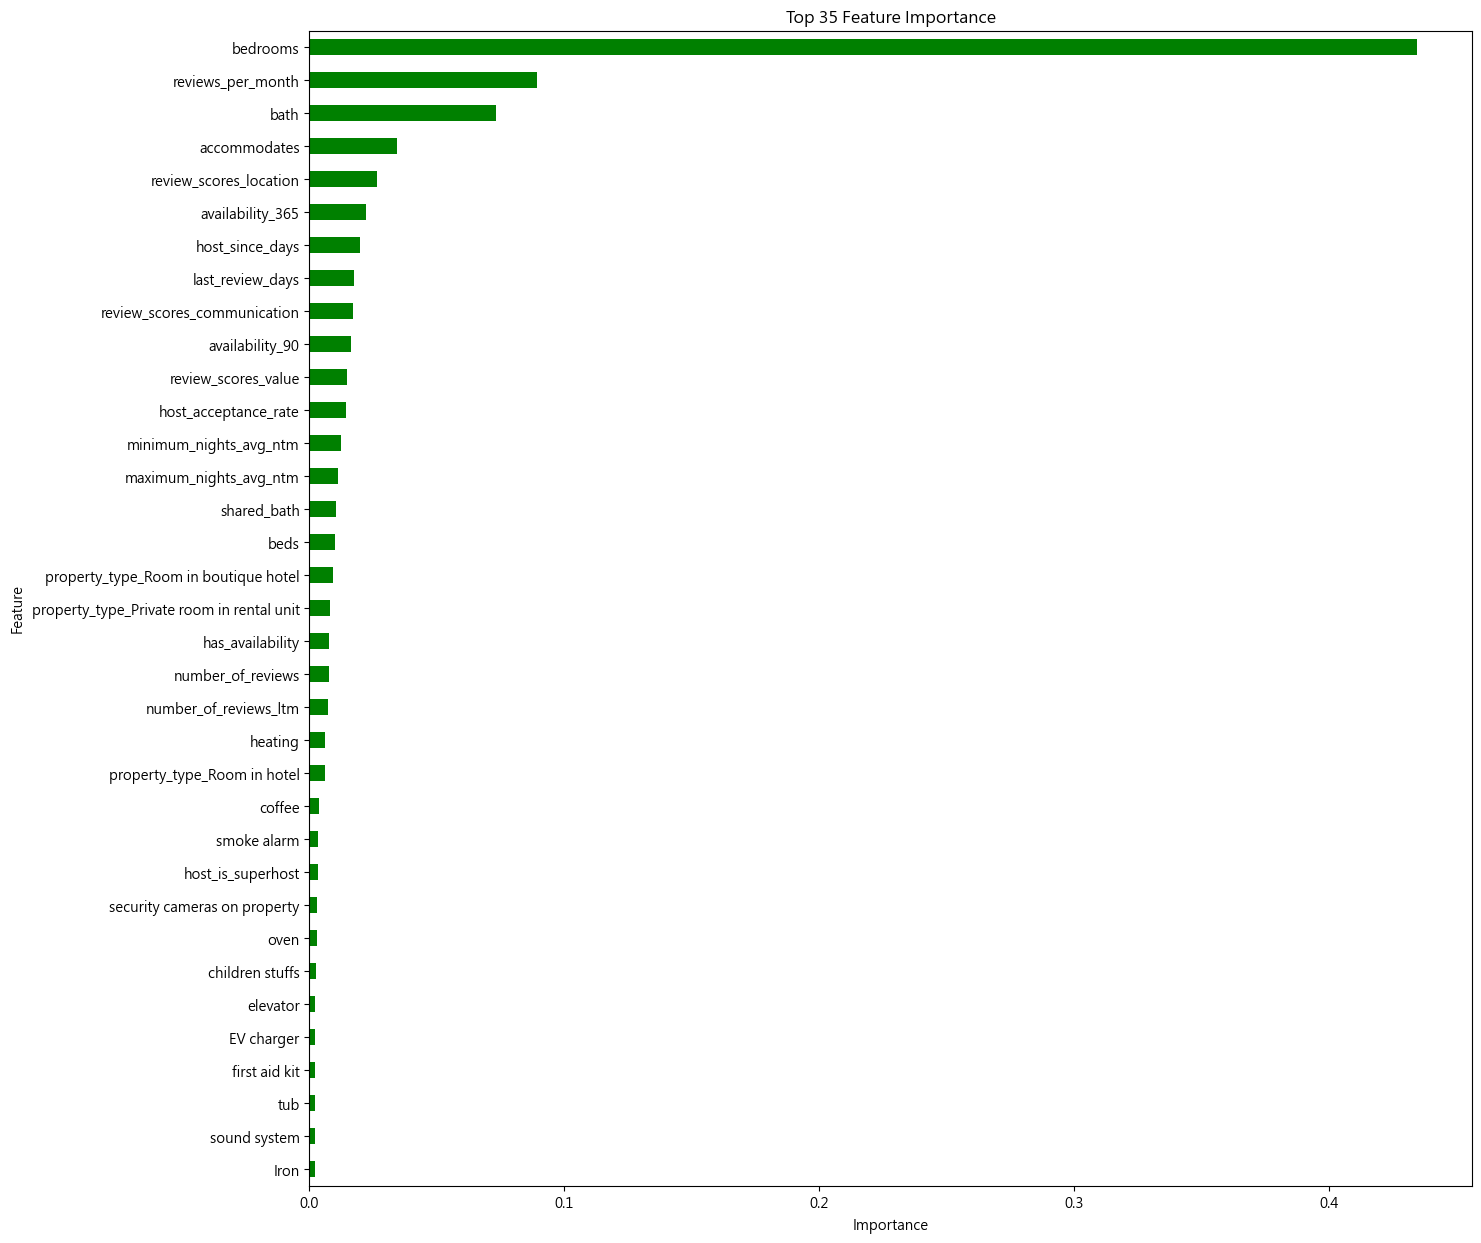

In [ ]:
best_rf_model_1 = rf_regressor_1.best_estimator_

feature_importances_1 = best_rf_model_1.feature_importances_

plt.figure(figsize=(15, 15))

global_importances_1 = pd.Series(feature_importances_1, index=X_train_1.columns)
global_importances_1.sort_values(ascending=True, inplace=True)
top_20_importances_1 = global_importances_1.tail(35)
top_20_importances_1.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 35 Feature Importance")

### 投票法3&4
Best

In [ ]:
# Split the data into training and testing sets with a ratio of 0.8 to 0.2
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_Voted_34, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
param_grid = {"n_estimators":[50,100,200,500],"max_depth":[5,10,15]}
rf_regressor_2 = GridSearchCV(RandomForestRegressor(),param_grid, cv=5)
# rf_regressor_2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor_2.fit(X_train_2, y_train_2)

# Predict on the test data
y_pred_2 = rf_regressor_2.predict(X_test_2)
y_train_pred_2 = rf_regressor_2.predict(X_train_2)

In [ ]:
# Calculate evaluation metrics
r2_2 = r2_score(y_test_2, y_pred_2)
mae_2 = mean_absolute_error(y_test_2, y_pred_2)
mse_2 = mean_squared_error(y_test_2, y_pred_2)
rmse_2 = np.sqrt(mse_2)

# Calculate the Adjusted R^2 value
n_2 = X_train_2.shape[0]  # Number of observations
p_2 = X_train_2.shape[1]  # Number of predictors
adjusted_r2_2 = 1 - (1 - r2_2) * (n_2 - 1) / (n_2 - p_2 - 1)

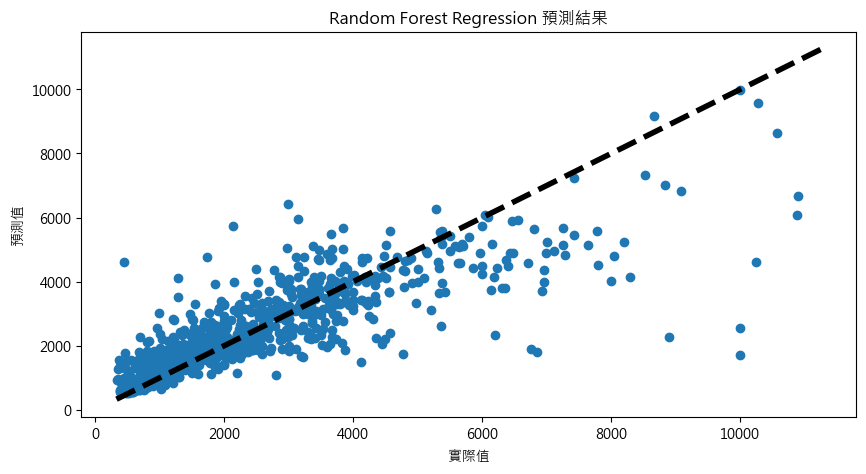

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 5))
plt.scatter(y_test_2, y_pred_2)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('實際值')
plt.ylabel('預測值')
plt.title('Random Forest Regression 預測結果')
plt.show()

In [ ]:
# Print out the evaluation metrics
print(f'R^2: {r2_2}')
print(f'Adjusted R^2: {adjusted_r2_2}')
print(f'MAE: {mae_2}')
print(f'MSE: {mse_2}')
print(f'RMSE: {rmse_2}')

R^2: 0.6788810589216897
Adjusted R^2: 0.6706830196872082
MAE: 595.4464846504906
MSE: 994178.8780620294
RMSE: 997.0851909751891


In [ ]:
test_2 = y_test_2.values.tolist()
predict_2 = y_pred_2.tolist()

print("真實值          預測值")
for i in range(20):
    print("{:<10} {:<10}".format(test_2[i], predict_2[i]))

真實值          預測值
2549       2246.9245715776046
9999       1703.2857058299412
900        806.5801092353383
2324       2116.4751628850004
1200       1242.3570637274483
1390       1740.731687455574
1957       2011.5347720541179
1050       1477.1197386000047
2343       2622.2618013430015
2700       3718.609694473194
2370       2467.420268514077
1703       1980.6102693392756
1600       2244.347903198653
1429       2018.9484113365168
1291       1605.7897060520324
2989       6419.827333333334
2000       3289.2899781619267
1800       1943.2082348714387
1125       980.3431295160833
4000       3661.674653046235


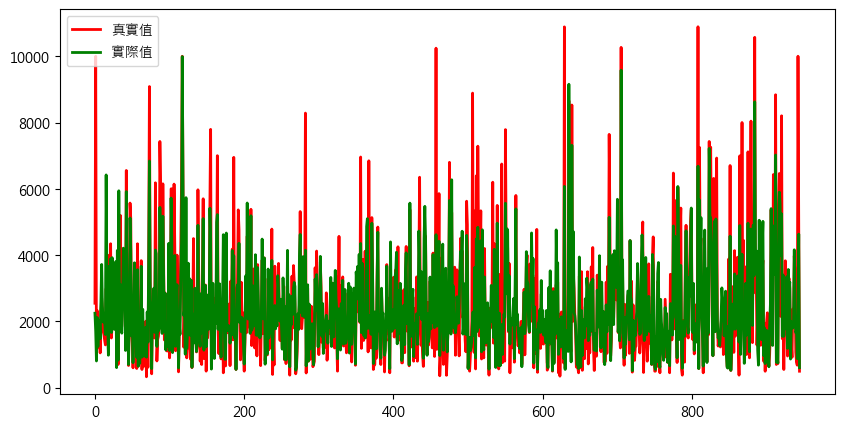

In [ ]:
t = np.arange(len(X_test_2))

plt.figure(figsize=(10, 5))
plt.plot(t, y_test_2, 'r', linewidth=2, label='真實值')
plt.plot(t, y_pred_2, 'g', linewidth=2, label='實際值')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Top 35 Feature Importance')

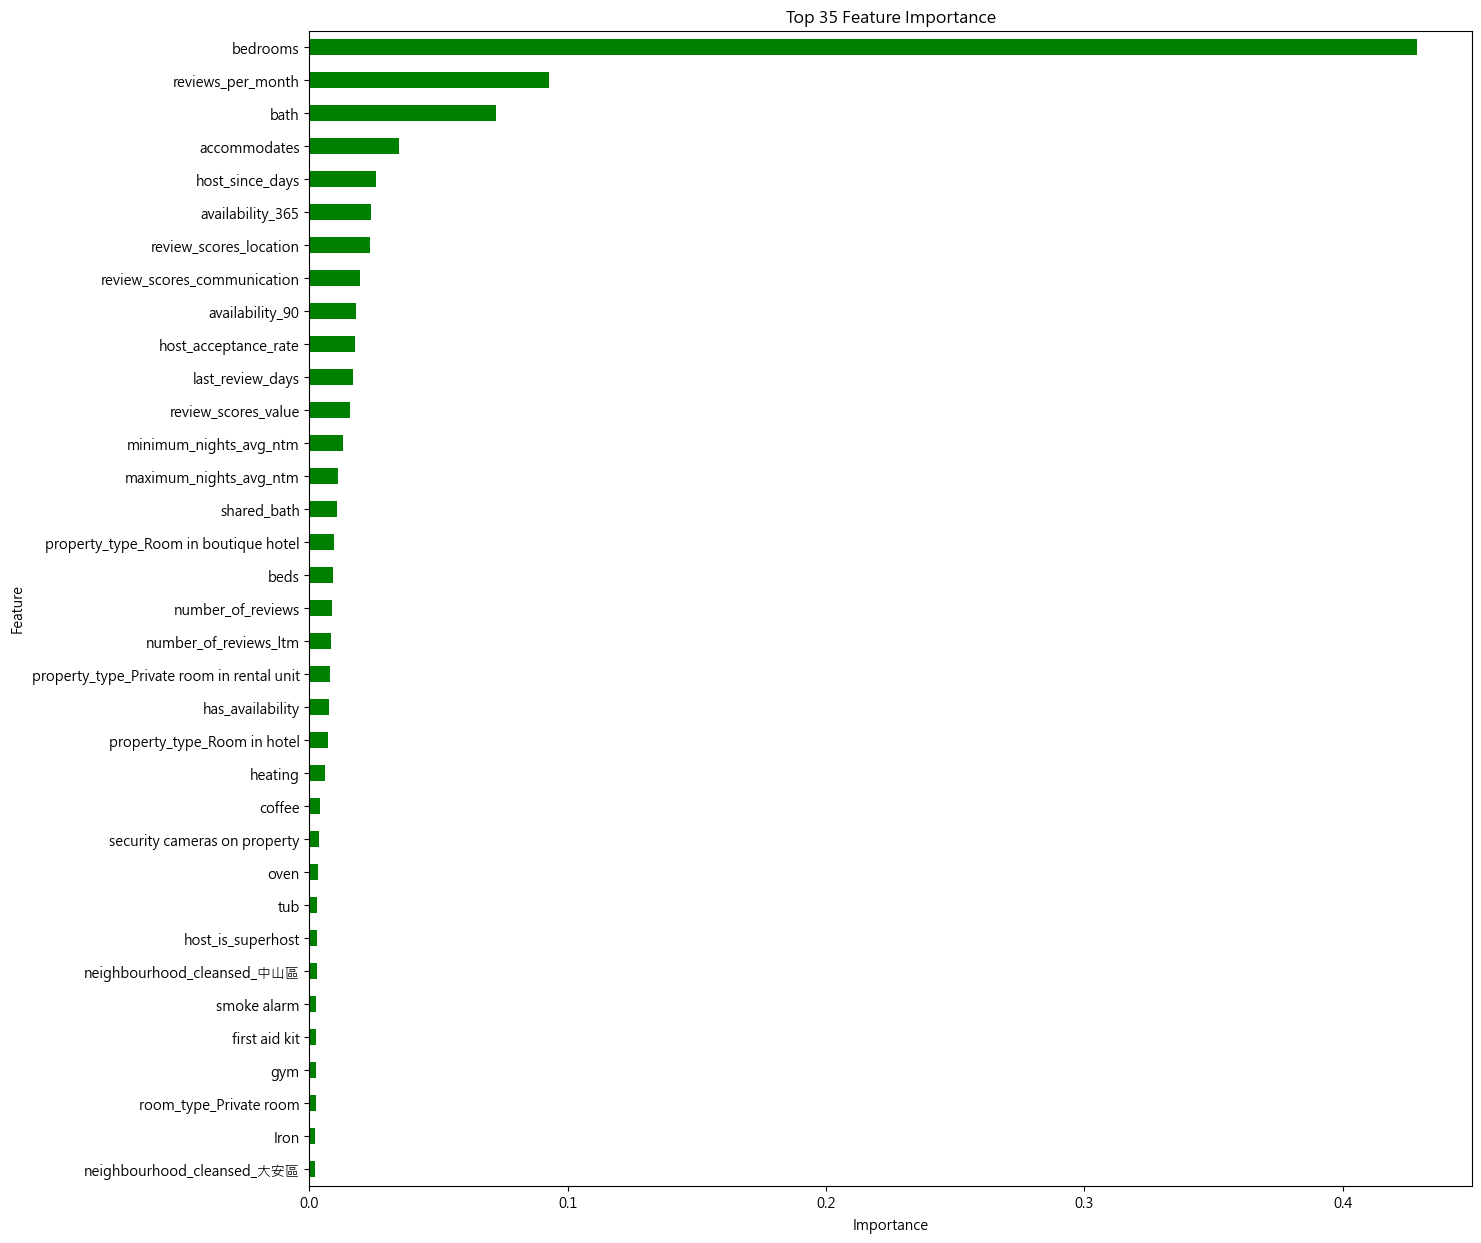

In [ ]:
best_rf_model_2 = rf_regressor_2.best_estimator_

feature_importances_2 = best_rf_model_2.feature_importances_

plt.figure(figsize=(15, 15))
global_importances_2 = pd.Series(feature_importances_2, index=X_train_2.columns)
global_importances_2.sort_values(ascending=True, inplace=True)
top_20_importances_2 = global_importances_2.tail(35)
top_20_importances_2.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 35 Feature Importance")

### 投票法4

In [8]:
# Split the data into training and testing sets with a ratio of 0.8 to 0.2
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_Voted_4, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_regressor_3 = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
param_grid = {"n_estimators":[50,100,200,500],"max_depth":[5,10,15]}
rf_regressor_3 = GridSearchCV(RandomForestRegressor(),param_grid, cv=5)
rf_regressor_3.fit(X_train_3, y_train_3)

# Predict on the test data
y_pred_3 = rf_regressor_3.predict(X_test_3)
y_train_pred_3 = rf_regressor_3.predict(X_train_3)

In [9]:
# Calculate evaluation metrics
r2_3 = r2_score(y_test_3, y_pred_3)
mae_3 = mean_absolute_error(y_test_3, y_pred_3)
mse_3 = mean_squared_error(y_test_3, y_pred_3)
rmse_3 = np.sqrt(mse_3)

# Calculate the Adjusted R^2 value
n_3 = X_train_3.shape[0]  # Number of observations
p_3 = X_train_3.shape[1]  # Number of predictors
adjusted_r2_3 = 1 - (1 - r2_3) * (n_3 - 1) / (n_3 - p_3 - 1)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

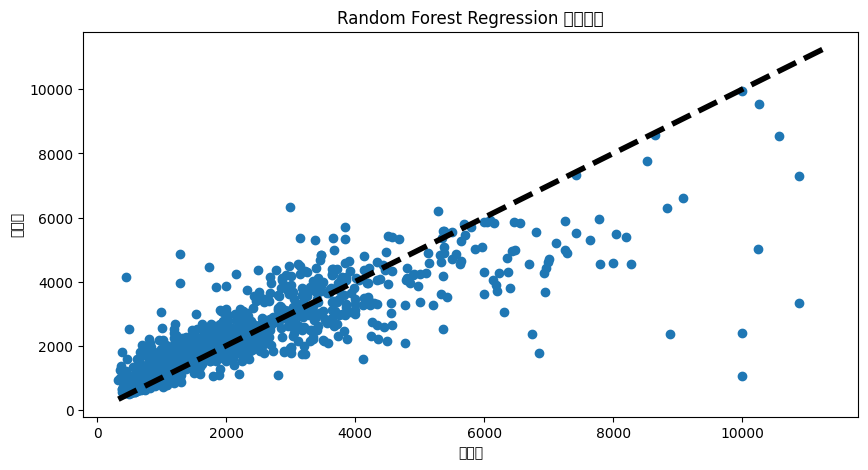

In [10]:
# Visualize the results
plt.figure(figsize=(10, 5))
plt.scatter(y_test_3, y_pred_3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('實際值')
plt.ylabel('預測值')
plt.title('Random Forest Regression 預測結果')
plt.show()

In [11]:
df1 = y_test_3.to_frame().reset_index(drop=True)
df2 = pd.DataFrame(y_pred_3, columns=['pred_price']).reset_index(drop=True)
output = pd.concat([df1, df2], axis=1)
output.isna().sum()

price         0
pred_price    0
dtype: int64

In [14]:
output.to_excel('Random forest預測投摽法4票結果.xlsx')

In [12]:
# Print out the evaluation metrics
print(f'R^2: {r2_3}')
print(f'Adjusted R^2: {adjusted_r2_3}')
print(f'MAE: {mae_3}')
print(f'MSE: {mse_3}')
print(f'RMSE: {rmse_3}')

R^2: 0.6787560377526799
Adjusted R^2: 0.6759238040486559
MAE: 590.8789724702093
MSE: 994565.941513107
RMSE: 997.2792695695158


In [13]:
test_3 = y_test_3.values.tolist()
predict_3 = y_pred_3.tolist()

print("真實值          預測值")
for i in range(20):
    print("{:<10} {:<10}".format(test_3[i], predict_3[i]))

真實值          預測值
2549       2227.112132403454
9999       1043.1461415150018
900        846.2683344155841
2324       2229.831606549198
1200       1127.5537383680303
1390       1804.631483536668
1957       2085.8643421145985
1050       1450.8787082963772
2343       2723.0829211147934
2700       3946.220368889636
2370       2420.960914775407
1703       1997.333846562537
1600       2139.6353125
1429       2037.8985640354638
1291       1658.8207201085504
2989       6341.800196308787
2000       3853.6332144516764
1800       1952.6004202544957
1125       929.4983082687398
4000       3471.6469984740806


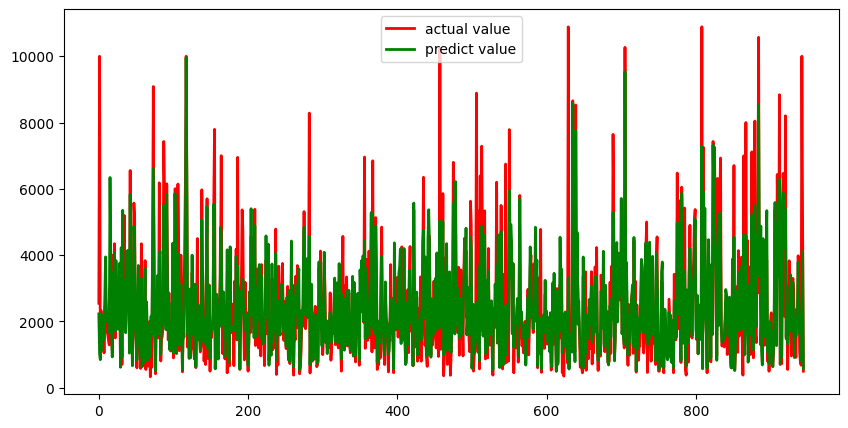

In [14]:
t = np.arange(len(X_test_3))

plt.figure(figsize=(10, 5))
plt.plot(t, y_test_3, 'r', linewidth=2, label='actual value')
#plt.plot(t, y_pred_3, 'g', linewidth=2, label='實際值')
plt.plot(t, y_pred_3, 'g', linewidth=2, label='predict value')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Top 35 Feature Importance')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21312 (\N{CJK UNIFIED IDEOGRAPH-5340}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 33836 (\N{CJK UNIFIED IDEOGRAPH-842C}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 33775 (\N{CJK UNIFIED IDEOGRAPH-83EF}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-59

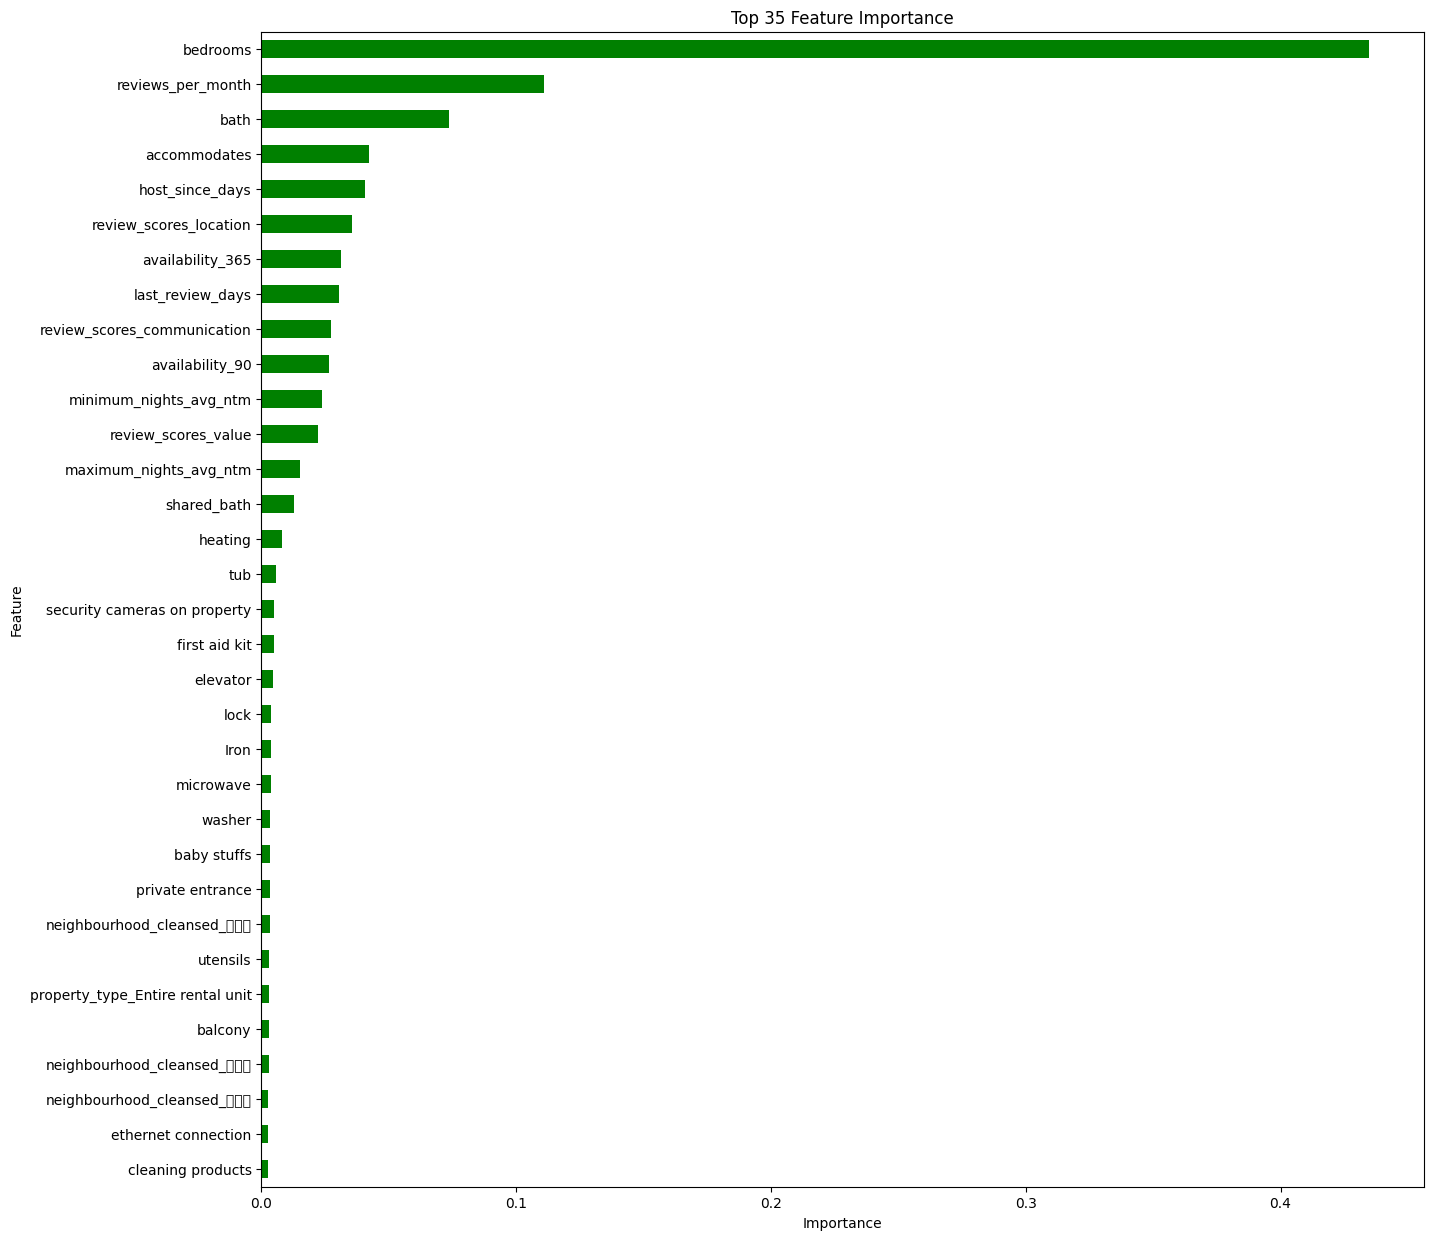

In [18]:
best_rf_model_3 = rf_regressor_3.best_estimator_

feature_importances_3 = best_rf_model_3.feature_importances_

plt.figure(figsize=(15, 15))

global_importances_3 = pd.Series(feature_importances_3, index=X_train_3.columns)
global_importances_3.sort_values(ascending=True, inplace=True)
top_20_importances_3 = global_importances_3.tail(35)
top_20_importances_3.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 35 Feature Importance")

In [19]:
feature_importances_3

array([0.11089518, 0.00363207, 0.03034307, 0.01296759, 0.00396226,
       0.07365376, 0.00818134, 0.00493914, 0.0024419 , 0.00591681,
       0.00502149, 0.00269008, 0.00281243, 0.00244617, 0.00328929,
       0.00319294, 0.04051216, 0.00448288, 0.02667674, 0.43454967,
       0.03537381, 0.02740964, 0.00304386, 0.00317327, 0.00288601,
       0.00389178, 0.03140551, 0.02216517, 0.0034075 , 0.01508089,
       0.02374709, 0.00339794, 0.04241057])

In [21]:
global_importances_3.to_excel('重要變數.xlsx')

In [22]:
global_importances_3

cleaning products                   0.002442
ethernet connection                 0.002446
neighbourhood_cleansed_中山區          0.002690
neighbourhood_cleansed_萬華區          0.002812
balcony                             0.002886
property_type_Entire rental unit    0.003044
utensils                            0.003173
neighbourhood_cleansed_大安區          0.003193
private entrance                    0.003289
baby stuffs                         0.003398
washer                              0.003408
microwave                           0.003632
Iron                                0.003892
lock                                0.003962
elevator                            0.004483
first aid kit                       0.004939
security cameras on property        0.005021
tub                                 0.005917
heating                             0.008181
shared_bath                         0.012968
maximum_nights_avg_ntm              0.015081
review_scores_value                 0.022165
minimum_ni